<a href="https://colab.research.google.com/github/Bilal123345/Final-Project-Dataset1-/blob/main/Final_Project(Dataset1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/annual_temp.csv')
df

,Source,Year,Mean
0,GCAG,2015,0.8990
1,GISTEMP,2015,0.8700
2,GCAG,2014,0.7402
3,GISTEMP,2014,0.7500
4,GCAG,2013,0.6687
...,...,...,...
267,GISTEMP,1882,-0.1000
268,GCAG,1881,-0.0707
269,GISTEMP,1881,-0.1200
270,GCAG,1880,-0.1247


In [ ]:
df.isnull().sum()

,0
Source,0
Year,0
Mean,0


In [ ]:
df.dropna()

,Source,Year,Mean
0,GCAG,2015,0.8990
1,GISTEMP,2015,0.8700
2,GCAG,2014,0.7402
3,GISTEMP,2014,0.7500
4,GCAG,2013,0.6687
...,...,...,...
267,GISTEMP,1882,-0.1000
268,GCAG,1881,-0.0707
269,GISTEMP,1881,-0.1200
270,GCAG,1880,-0.1247


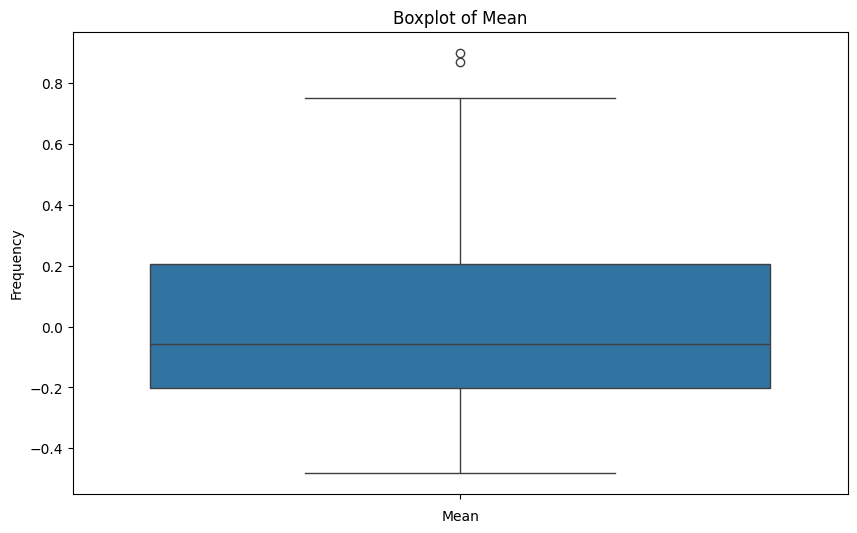

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Mean'])
plt.title('Boxplot of Mean')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.show()



In [ ]:
Q1=df['Mean'].quantile(0.25)
Q3=df['Mean'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound)
print(upper_bound)
df=df[(df['Mean']>=lower_bound)&(df['Mean']<=upper_bound)]
df

0.40895000000000004
-0.8154750000000002
0.8203250000000001


,Source,Year,Mean
2,GCAG,2014,0.7402
3,GISTEMP,2014,0.7500
4,GCAG,2013,0.6687
5,GISTEMP,2013,0.6600
6,GCAG,2012,0.6219
...,...,...,...
267,GISTEMP,1882,-0.1000
268,GCAG,1881,-0.0707
269,GISTEMP,1881,-0.1200
270,GCAG,1880,-0.1247


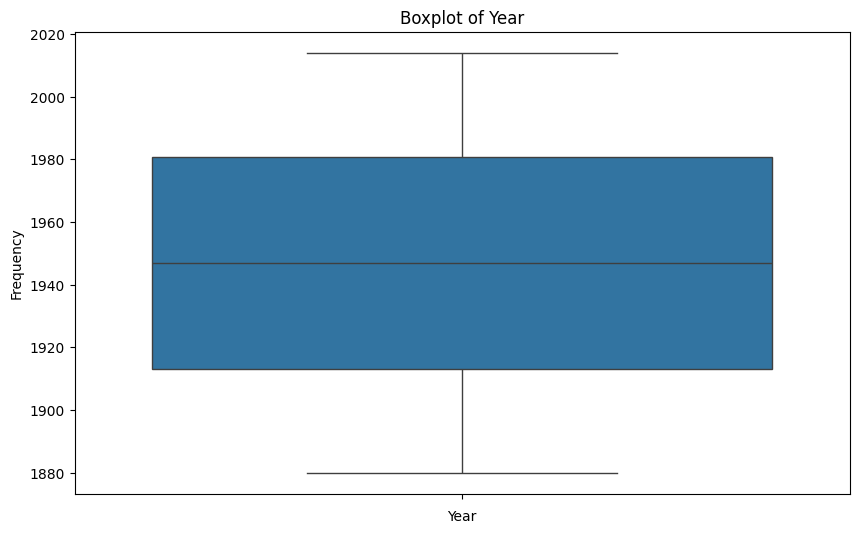

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Year'])
plt.title('Boxplot of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()


In [ ]:
d= df.groupby('Source')
d

In [ ]:
for Source, Source_df in d:
  print(Source)
  print(Source_df)

GCAG
    Source  Year    Mean
2     GCAG  2014  0.7402
4     GCAG  2013  0.6687
6     GCAG  2012  0.6219
8     GCAG  2011  0.5759
10    GCAG  2010  0.7008
..     ...   ...     ...
262   GCAG  1884 -0.2099
264   GCAG  1883 -0.1481
266   GCAG  1882 -0.0710
268   GCAG  1881 -0.0707
270   GCAG  1880 -0.1247

[135 rows x 3 columns]
GISTEMP
      Source  Year  Mean
3    GISTEMP  2014  0.75
5    GISTEMP  2013  0.66
7    GISTEMP  2012  0.64
9    GISTEMP  2011  0.61
11   GISTEMP  2010  0.72
..       ...   ...   ...
263  GISTEMP  1884 -0.28
265  GISTEMP  1883 -0.20
267  GISTEMP  1882 -0.10
269  GISTEMP  1881 -0.12
271  GISTEMP  1880 -0.20

[135 rows x 3 columns]


In [ ]:
d.get_group('GCAG')

,Source,Year,Mean
2,GCAG,2014,0.7402
4,GCAG,2013,0.6687
6,GCAG,2012,0.6219
8,GCAG,2011,0.5759
10,GCAG,2010,0.7008
...,...,...,...
262,GCAG,1884,-0.2099
264,GCAG,1883,-0.1481
266,GCAG,1882,-0.0710
268,GCAG,1881,-0.0707


In [ ]:
d.get_group('GISTEMP')

,Source,Year,Mean
3,GISTEMP,2014,0.75
5,GISTEMP,2013,0.66
7,GISTEMP,2012,0.64
9,GISTEMP,2011,0.61
11,GISTEMP,2010,0.72
...,...,...,...
263,GISTEMP,1884,-0.28
265,GISTEMP,1883,-0.20
267,GISTEMP,1882,-0.10
269,GISTEMP,1881,-0.12


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
scaler = StandardScaler()
features = df[['Mean']]
scaled_features = scaler.fit_transform(features)
scaled_features
target=df['Year']
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
print(y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
from sklearn.metrics import mean_absolute_error
print('MAE',mean_absolute_error(y_test,y_pred))
from sklearn.metrics import mean_squared_error
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
from sklearn.metrics import mean_absolute_percentage_error # Correct module name
print('MAPE',mean_absolute_percentage_error(y_test,y_pred))
n=40
k=2
adj_r2_score =1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

[1994.08553267 1922.60896361 1942.18313389 1937.69621806 1911.01028621
 1939.93967597 1896.1922467  1970.22635778 1928.21760839 1917.50509686
 1917.50509686 1930.43863172 1927.60065746 1962.97998873 1926.47892851
 1908.60978624 1927.92595886 1966.56952138 1954.79136735 1961.36469903
 1893.94878879 1936.49596808 1990.1819159  1976.47438806 1914.13990999
 2025.19107661 2013.35683613 1932.08757328 1941.06140493 2011.93224035
 1952.27869449 1974.16362641 1961.80217332 1915.99076277 1927.14074859
 2009.02696236 1931.88566207 1981.44364734 1927.60065746 1929.78802892
 2015.09551601 1945.54832075 1909.88855725 2021.82588974 1930.96584433
 1919.65881645 1954.93719211 1901.10541953 1936.57448911 1916.27119501
 2018.46070288 1940.85949372 1915.50841932 1932.85034897]
Mean Squared Error: 457.1857834442585
R^2 Score: 0.700940158920095
MAE 17.181226794280647
MSE 457.1857834442585
RMSE 21.38190317638396
MAPE 0.008875423229358517
0.684774762104965


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np # Import numpy for array operations

data = pd.read_csv('/content/annual_temp.csv')
scaler = StandardScaler()
features = data[['Mean']]
scaled_features = scaler.fit_transform(features)
target = data['Year']
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)
y_pred = logistic_regressor.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
X_test_new = np.array([[6], [8]])
predictions = logistic_regressor.predict(X_test_new)
y_pred_2d = logistic_regressor.predict(X_test).reshape(-1, 1)
print(f"Predictions for test data: {predictions}")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
from sklearn.metrics import mean_absolute_error
print('MAE',mean_absolute_error(y_test,y_pred))
from sklearn.metrics import mean_squared_error
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
from sklearn.metrics import mean_absolute_percentage_error # Correct module name
print('MAPE',mean_absolute_percentage_error(y_test,y_pred))
n=40
k=2
adj_r2_score =1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

Accuracy: 0.0
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

        1881       0.00      0.00      0.00       1.0
        1882       0.00      0.00      0.00       1.0
        1889       0.00      0.00      0.00       1.0
        1890       0.00      0.00      0.00       1.0
        1892       0.00      0.00      0.00       1.0
        1893       0.00      0.00      0.00       1.0
        1894       0.00      0.00      0.00       0.0
        1895       0.00      0.00      0.00       0.0
        1899       0.00      0.00      0.00       1.0
        1902       0.00      0.00      0.00       2.0
        1903       0.00      0.00      0.00       1.0
        1904       0.00      0.00      0.00       0.0
        1905       0.00      0.00      0.00       1.0
        1906       0.00      0.00      0.00       0.0
        1907  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

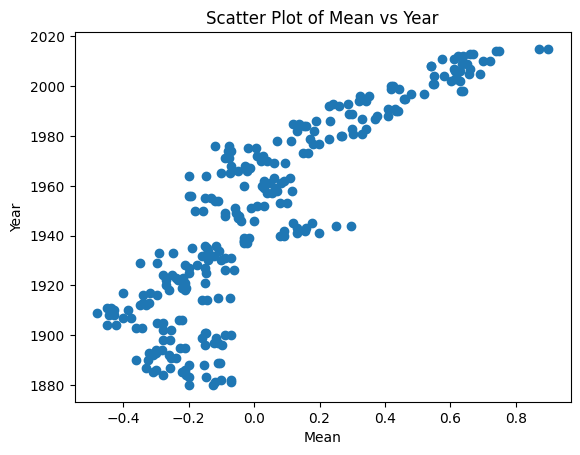

Mean Squared Error: 515.8363636363637
R^2 Score: 0.6567498245698937
MAE 16.963636363636365
MSE 515.8363636363637
RMSE 22.712031252980516
MAPE 0.008725388615310586
0.6381957610331312


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/annual_temp.csv')
poly = PolynomialFeatures(degree=2)
features = df[['Mean']]
target = df['Year']
df
plt.scatter(features, target)
plt.xlabel('Mean')
plt.ylabel('Year')
plt.title('Scatter Plot of Mean vs Year')
plt.show()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
from sklearn.metrics import mean_absolute_error
print('MAE',mean_absolute_error(y_test,y_pred))
from sklearn.metrics import mean_squared_error
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
from sklearn.metrics import mean_absolute_percentage_error # Correct module name
print('MAPE',mean_absolute_percentage_error(y_test,y_pred))
n=40
k=2
adj_r2_score =1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Predictions for test data: [2015. 2015.]


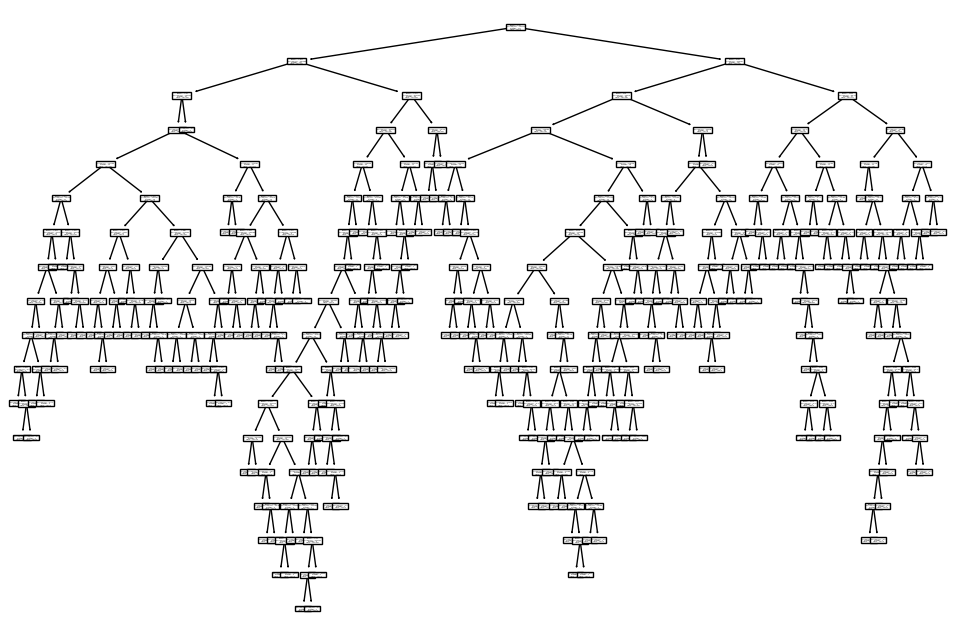

Mean Squared Error: 515.8363636363637
R^2 Score: 0.6567498245698937
MAE 16.963636363636365
MSE 515.8363636363637
RMSE 22.712031252980516
MAPE 0.008725388615310586
0.6381957610331312


In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
X = df[['Mean']]
y = df['Year']
model = DecisionTreeRegressor()
model.fit(X, y)
X_test = np.array([[6], [8]])
predictions = model.predict(X_test)
print(f"Predictions for test data: {predictions}")
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['Mean'])
plt.show()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
from sklearn.metrics import mean_absolute_error
print('MAE',mean_absolute_error(y_test,y_pred))
from sklearn.metrics import mean_squared_error
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
from sklearn.metrics import mean_absolute_percentage_error # Correct module name
print('MAPE',mean_absolute_percentage_error(y_test,y_pred))
n=40
k=2
adj_r2_score =1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


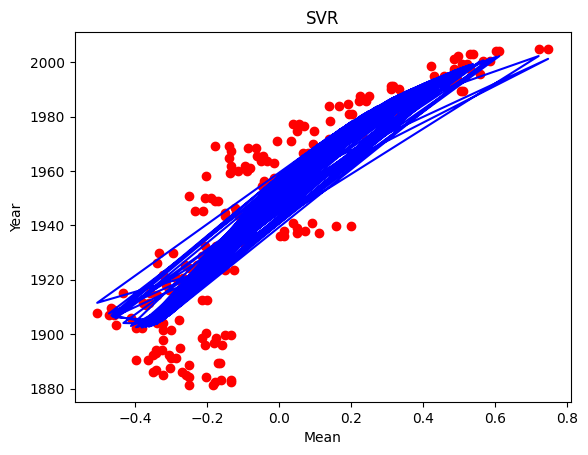

Mean Squared Error: 3789007.674841426
R^2 Score: -3789006.6748414263
MAE 1946.3046468648788
MSE 3789007.674841426
RMSE 1946.537355110717
MAPE 5155.666039204165
-3993817.9005085304


In [ ]:
from sklearn .preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('/content/annual_temp.csv')
features=['Mean']
label=['Year']
x=df.loc[:,features].values
y=df.loc[:,label].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x=df[features]
y=df[label]
sc_x=StandardScaler()
sc_y=StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)
from sklearn.svm import SVR
reg=SVR(kernel='rbf')
reg.fit(x_train,y_train)
plt.scatter(sc_x.inverse_transform(x_train),sc_y.inverse_transform(y_train),color='red')

# Reshape the predictions before inverse transforming
plt.plot(sc_x.inverse_transform(x_train),sc_y.inverse_transform(reg.predict(x_train).reshape(-1, 1)),color='blue')  # Reshape predictions here

np.set_printoptions(precision=2)
# Reshape the predictions before inverse transforming
y_pred_2d = reg.predict(x_test).reshape(-1, 1)
y_pred=sc_y.inverse_transform(y_pred_2d)  # Use the reshaped predictions

np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

plt.title('SVR')
plt.xlabel('Mean')
plt.ylabel('Year')
plt.show()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
from sklearn.metrics import mean_absolute_error
print('MAE',mean_absolute_error(y_test,y_pred))
from sklearn.metrics import mean_squared_error
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
from sklearn.metrics import mean_absolute_percentage_error # Correct module name
print('MAPE',mean_absolute_percentage_error(y_test,y_pred))
n=40
k=2
adj_r2_score =1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)